# Projeto 1 - Ciência dos Dados

Nome: Gustavo Pinheiro de Carvalho

Nome: Maria Eduarda Matta Mercer Mourão

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [52]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gustavopinheiro/P1-CD21-1


### Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [53]:
filename = 'Xiaomi.xlsx'

In [54]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação
0,@baixinho04 xiaomi seria uma boa opção. eu ten...,1
1,"ainda bem q tenho xiaomi e ele tá cm 73%, dura...",0
2,@tetenc555 @naegiwcat eu vó compra um xiaomi r...,0
3,@10icarocaldas por esse preço tu comprar o xia...,0
4,vcs que tem xiaomi sabiam que dá p/ usar o you...,0


In [55]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",0
1,a xiaomi me prometeu qualidade,0
2,algum sugar daddy on pra me dar o robo aspirad...,0
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",0
4,meu celular ja ta em fim de carreira n vejo a ...,0


### Definindo as variáveis qualitativas como categóricas

#### Treinamento

In [56]:

train.Classificação = train.Classificação.astype('category')
train.Classificação.cat.categories = ('Irrelevnte', 'Relevante')
train.head(10)

,Treinamento,Classificação
0,@baixinho04 xiaomi seria uma boa opção. eu ten...,Relevante
1,"ainda bem q tenho xiaomi e ele tá cm 73%, dura...",Irrelevnte
2,@tetenc555 @naegiwcat eu vó compra um xiaomi r...,Irrelevnte
3,@10icarocaldas por esse preço tu comprar o xia...,Irrelevnte
4,vcs que tem xiaomi sabiam que dá p/ usar o you...,Irrelevnte
5,@10icarocaldas xiaomi é o melhor celular custo...,Relevante
6,"@_lucast7 @g1 verdade, mas pelo menos o preço ...",Irrelevnte
7,a xiaomi lançou um celular com a acabamento em...,Irrelevnte
8,@mathmj @madunixs @affectionmauro xiaomi alem ...,Relevante
9,@nn_carvalhosa @g1 no caso da xiaomi o consumi...,Irrelevnte


#### Teste

In [57]:
test.Classificação = test.Classificação.astype('category')
test.Classificação.cat.categories = ('Irrelevante', 'Relevante')
test.head(10)

,Teste,Classificação
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",Irrelevante
1,a xiaomi me prometeu qualidade,Irrelevante
2,algum sugar daddy on pra me dar o robo aspirad...,Irrelevante
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",Irrelevante
4,meu celular ja ta em fim de carreira n vejo a ...,Irrelevante
5,a xiaomi mi band 6 estará mesmo a chegar?\nhtt...,Irrelevante
6,xiaomi não decepciona em nada 👏,Relevante
7,@wos4you vai ser o mesmo lugar q eu vou mandar...,Irrelevante
8,@kaiiirtss xiaomi sksksks,Irrelevante
9,@jopedrobf gastou dinheiro atoa... a não ser q...,Irrelevante


### Estudo dos valores e quantidades de tweets de cada classificação

#### Treinamento

In [58]:
train.Classificação.value_counts(True)

Irrelevnte    0.733333
Relevante     0.266667
Name: Classificação, dtype: float64

In [59]:
train_classificacao = train.Classificação.value_counts()
i=0
for title, var_quanti in (('Irrelevante', train_classificacao[0]), ('Relevante', train_classificacao[1])):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {train_classificacao[i]}')
    i += 1

-------------------------------------------------------
Irrelevante
-------------------------------------------------------
contagem               = 220
---------------------------------------------
Relevante
---------------------------------------------
contagem               = 80


##### Gráfico

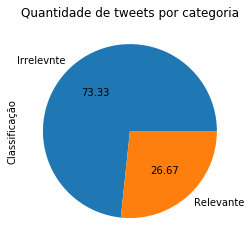

In [60]:
train_classificacao = train.Classificação.value_counts()
train_classificacao.plot(kind='pie', title='Quantidade de tweets por categoria', autopct="%.2f")

#### Teste

In [61]:
test.Classificação.value_counts(True)

Irrelevante    0.643333
Relevante      0.356667
Name: Classificação, dtype: float64

In [62]:
test_classificacao = test.Classificação.value_counts()
i=0
for title, var_quanti in (('Irrelevante', test_classificacao[0]), ('Relevante', test_classificacao[1])):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {test_classificacao[i]}')
    i += 1

-------------------------------------------------------
Irrelevante
-------------------------------------------------------
contagem               = 193
---------------------------------------------
Relevante
---------------------------------------------
contagem               = 107


##### Gráfico

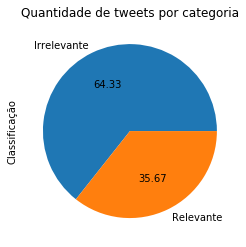

In [63]:

test_classificacao.plot(kind='pie', title='Quantidade de tweets por categoria', autopct="%.2f")

___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

 A marca escolhida para o classificador Naive-Bayes foi a Xiaomi, empresa chinesa de eletrônicos que divide opiniões a respeito da qualidade e da aceitabilidade dos seus produtos no mercado brasileiro. 

Consideramos como relevantes todos aqueles tweets que expressavam opiniões dos usuários e consumidores sobre os produtos da marca, tanto positivos como negativos. Assim, podemos selecionar os tweets que podem apontar a situação atual da marca, e também os problemas e acertos nos produtos comercializados nacionalmente.

Como estamos obtendo nossas informações do Twitter, decidimos considerar como não relevantes os tweets que não expressavam nenhum tipo de opinião, ou aqueles que eram a respeito de sorteios e premiações, algo bem comum dentro dessa plataforma.

Portanto, durante a análise, encontramos a necessidade de cálculas as seguintes probabilidades para que nosso classificador desempenhasse a função desejada:

- $P(Tweet|Classificação)$: probabilidade do tweet pertencer a categoria Relevante;
- $P(Classificação)$: probabilidade da categoria dentre o total de tweets (TREINAMENTO);
- $P(Tweet)$: probabilidade de uma frase ocorrer na língua portuguesa.
- $P(Palavra|Classificação)$: probabilidade de uma palavra ser de dada categoria;
- $P(Classificação|Tweet)$: probabilidade de dado tweet ser classificado com alguma das categorias;

Começamos os cálculos com a ideia primária do Naive-Bayes:

$$P(Classificação|Tweet)=\frac{P(Classificação \cap Tweet)}{P(Tweet)}=\frac{P(Tweet|Classificação)P(Classificação)}{P(Tweet)}\hspace{3cm}\mbox{(I)}$$

Onde a probabilidade de um tweet ser de dada classificação (P(Tweet|Classificação)) seria calculado pela probabilidade de classificação de cada palavra (ou emoji) presente no tweet.

$$P(Tweet|Classificação) = P(Palavra 1|Classificação) * P(Palavra 2|Classificação) * P(Palavra 3|Classificação)\hspace{3cm}\mbox{(II)}$$

Para que a probabilidade de uma dada palavra ser classificada por uma das categorias fosse calculada, surgiu um grande problema: O que aconteceria caso surgisse uma palavra nova que não estivesse previamente inserida em uma das categorias?

Entra ai a necessidade de aplicarmos o 'La Place Smoothing', que é justamente uma técnica que lida com a possibilidade de uma probabilidade de uma palavra que não esta no treinamento receber probabilidade zero. Podemos representar P(Palavra Nova|Classificação) por:

$$P(Palavra Nova|Classificação)=\frac{Numbers Of Reviews With Palavra Nova Por Classificação = Classificação + alpha}{N + alpha*Vocabulário}\hspace{3cm}\mbox{(III)}$$

alpha: Parâmetro de smoothing (vamos usar =1);

K: número de features nos dados;

N: número de classificações para cada categoria (somatório).

Portanto, a fórmula para novas palavras fica:

$$P(Palavra Nova|Classificação)=\frac{Numbers Of Reviews With Palavra Nova Por Classificação = Classificação + 1}{N + Vocabulário}\hspace{3cm}\mbox{(IV)}$$

Assim, podemos calcular a probabilidade de um tweet ser categorizado com umas das categorias:

$$P(Classificação|Tweet) = P(Palavra 1|Classificação) * P(Palavra 2|Classificação) * P(Palavra 3|Classificação) *P(Palavra Nova|Classificação)*P(Classificação)\hspace{2cm}\mbox{(V)}$$




### Função de limpeza dos tweets:

In [120]:
import re
#import nltk
#nltk.download('punkt')
#stop_words = stopwords.words("english")
# A ideia de remover as 'stop words' é retirar as palavras que não tem conrtribuição de significado para o texto.

def cleanup(tweet_og):
    #tweet = ' '.join([word for word in tweet_og.split(' ') if word not in stop_words]) # Remove as 'stop word'
    tweet = re.sub("https*\S+", " ", tweet_og) # Remove as URL
    tweet = re.sub('\s{2,}', " ", tweet_og) # Remove espaços múltiplos
    tweet = re.sub("#\S+", " ", tweet_og) # Remove Hashtags
    tweet = " ".join(re.findall("(\w+|[^\w ]+)",tweet_og)) # Adiciona espaços entre os Emojis
    #tweet = re.sub("@\S+", " ", tweet_og) # Remove menções de usuários
    tweet = re.sub(re.compile("""[!-',.:)"(?;#@]"""), '', tweet_og)  # Remove as pontuações
    tweet = re.sub('\n','',tweet_og) #Remove '\n'
    tweet = re.sub('rt','',tweet_og) #Remove os 'rt'
    #tweet = word_tokenize(tweet_og) # Remove caracteres múltiplos
    tweet = tweet_og.lower() # Transforma o texto em letras minúsculas
    
    
    return tweet


#### Teste funçao de limpeza:

In [121]:
tweet_teste = 'Xiaomi é muito boa 👏, kkkkkkk mesmooo'
tweet_teste = cleanup(tweet_teste)
tweet_teste = tweet_teste.split()
print(tweet_teste)

['xiaomi', 'é', 'muito', 'boa', '👏,', 'kkkkkkk', 'mesmooo']


___
### Montando um Classificador Naive-Bayes

A ideia de criar uma classe para o nosso Classificador Naive-Bayes é que poderemos utiliza-la para diferentes datasets 

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [122]:
# Classificador Naive Bayes Primário:

# Aplicando função de limpeza

relevante = []
irrelevante = []

for tweet in range(len(train.Treinamento)):
    tweet_treinamento = cleanup(train.Treinamento[tweet]).split()
    #tweet_treinamento.split()
    train.Treinamento[tweet] = tweet_treinamento
    

    for tweet in range(len(tweet_treinamento[tweet])):
        if train.Classificação[tweet] == 'Relevante':
            relevante.append(tweet_treinamento(tweet))
        elif train.Classificação[tweet] == 'Irrelevante':
            irrelevante.append(tweet_treinamento(tweet))
            
    #relevante

# Cálculo e contagem de palavras ("dicionário com todas as palavras da planilha TREINAMENTO)

for classificacao in train['Classificação']:
    if classificacao == 'Relevante':
        lista_probabilidade.append(classificacao)
    elif classificacao == 'Irrelevante':
        lista_probabilidade.append(classificacao)
        
    
relevante    
        
#tweet_treinamento
    
    #for j in range(len(tweet_treinamento))

#tweets_treinamento = dados['Treinamento']
#categorias = dados['Classificação']
#dicionario_categorias = np.array([defaultdict(lambda :0) for i in categorias.shape[0]])

#for tweet, classificacao in enumerate(categorias):
    #unica_categoria_tweet = tweets_treinamento[categorias == classificacao]
    #unica_categoria_tweet_limpo.append(cleanup(tweet))
#for i in range(categorias):
    #dicionario_categorias = dict(categorias)

TypeError: expected string or bytes-like object

In [123]:
tweet_treinamento

['@baixinho04',
 'xiaomi',
 'seria',
 'uma',
 'boa',
 'opção.',
 'eu',
 'tenho',
 'motorola',
 'e',
 'a',
 'câmera',
 'não',
 'é',
 'bacana.',
 'samsung',
 'tem',
 'uma',
 'boa',
 'câmera',
 'tbm,',
 'porém',
 'o',
 'android',
 'é',
 'o',
 'menos',
 'puro.']

In [124]:
irrelevante

[]

In [125]:
# Cálculo e contagem de palavras ("dicionário com todas as palavras da planilha TREINAMENTO)

lista_probabildade = []

for classificacao in train.Classificação:
    if classificacao == 'Relevante':
        lista_probabilidade.append(classificacao)
    elif classificacao == 'Irrelevante':
        lista_probabilidade.append(classificacao)
       
        
for classificacao_ in lista_probabilidade:
    if classificacao_ == 'Relevante':
        quantidade_tweet_relevante += 1
    if classificacao_ == 'Irrelevante':
        quantidade_tweet_irrelevante += 1
        
palavras_relevante = [[palavra, relevante.count(palavra)] for palavra in set(relevante)]
palavras_irrelevante = [[palavra, irrelevante.count(palavra)] for palavra in set(irrelevante)]
        
vocabulario = 0
relevante_ = 0
irrelevante_ = 0

for palavra in range(len(palavras_relevante)):
    vocabulario = vocabulario + palavras_relevante[palavra][1]
for palavra in range(len(palavras_irrelevante)):
    vocabulario = vocabulario + palavras_irrelevante[palavra][1]
        
print('Total de palavras', len(palavras_relevante)+len(palavras_irrelevante))
print('Total de palavras relevantes', len(palavras_relevante))
print('Total de palavras não relevantes', len(palavras_irrelevante))

NameError: name 'lista_probabilidade' is not defined

In [ ]:
# Limpando as planilhas teste:

for i in range(len(train.Treinamento)):
    tweet_treinamento = cleanup(train.Treinamento[i])
    tweet_treinamento.split()
    train['Treinamento'] = tweet_treinamento
    
    for palavra in range(len(tweet_treinamento)):
        if train.Classificação[i] == 'Relevante':
            relevante.append(tweet_treinamento(palavra))
        elif train.Classificação[i] == 'Irrelevante':
            irrelevante.append(tweet_treinamento(palavra))
            
            

In [ ]:
probabilidade_relevante = []
a = 1
for tweet in range(len(test.Teste)):
    clinha = []
    for palavra in range(len(test.Teste[i])):
        chance = 0
        

In [47]:
test['Previsão'] = novas_classificacoes
test.head()

,Teste,Classificação,Predição,Previsão
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",Irrelevante,Relevante,Relevante
1,a xiaomi me prometeu qualidade,Irrelevante,Irrelevnte,Irrelevnte
2,algum sugar daddy on pra me dar o robo aspirad...,Irrelevante,Relevante,Relevante
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",Irrelevante,Relevante,Relevante
4,meu celular ja ta em fim de carreira n vejo a ...,Irrelevante,Irrelevnte,Irrelevnte


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [49]:

acuracia=np.sum(test['Previsão']==test['Classificação'])/test_labels.shape[0]

print ("Acurácia do Modelo: ",acuracia*100,"%")

Acurácia do Modelo:  23.0 %


## Porque não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets?

## Diferentes cenários de uso para o classificador Naive-Bayes:

## Possíveis melhorias para o classificador Naive-Bayes:

___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

[Cleaning Text Data with Python](https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76) **Cleanup Text Function**

[Laplace smoothing in Naïve Bayes algorithm](https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece) **Método de La Place Smoothing**

[Naive Bayes Classifier From Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/) **Naive Bayes Classifier from scratch**

[In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html) **Confusion Matrix**